 Methods for Data Driven Modelling. Tutorial 1 Starting Notebook 1 S.C JFdCd R.M F.Z.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

#Read time series t, x(t),y(t) generated with a drift D 
data=np.loadtxt('Data/dataM1000d2.5.dat')

#Read the number of data point from the data
M=np.size(data[:,1])



Question 1

In [2]:
#Compute the distance r
r=np.sqrt(data[:,1]*data[:,1]+data[:,2]*data[:,2])

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_108048/3671147095.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('x $(\mu m)$')
/tmp/ipykernel_108048/3671147095.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('y $(\mu m)$')
/tmp/ipykernel_108048/3671147095.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('r $(\mu m)$')


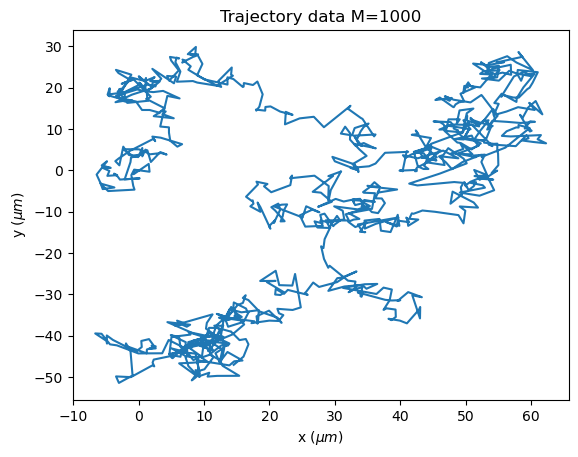

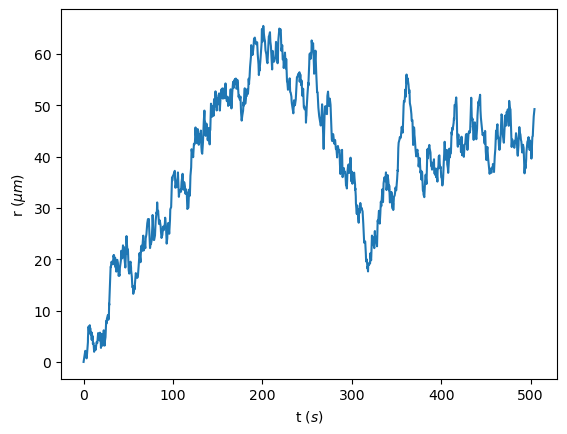

In [3]:
# Plot the trajectory  #Plot separately the x ane the y
plt.plot(data[:,1],data[:,2])
plt.xlabel('x $(\mu m)$')
plt.ylabel('y $(\mu m)$')
plt.title('Trajectory data M=1000')
plt.show()


plt.plot(data[:,0],r)
plt.xlabel('t $(s)$')
plt.ylabel('r $(\mu m)$')
plt.show()



Question 2 \
$P(\delta x,\delta y|D,\delta t) = \frac{1}{4\pi D\delta t}e^{-\frac{\delta x^2+\delta y^2}{4Ddt}}$ \
$P(\delta r|D,\delta t) = \frac{\delta r}{2 D\delta t}e^{-\frac{\delta r^2}{4Ddt}}$

In [4]:
#Compute one estimate of D, using only final displacement
D0=np.power(r[M-1],2)/data[M-1,0]/4
print("First estimate of D:",D0)



#Compute another estimate of D using all displacements
diffdata=np.diff(data,axis=0)
dr2=(np.power(diffdata[:,1],2)+np.power(diffdata[:,2],2))/diffdata[:,0]
D1=np.mean(dr2)/4.
print("Second estimate of D:",D1)

First estimate of D: 1.2030749624900892
Second estimate of D: 2.474673342340977


Question 3 \
$p(\{\delta x_i, \delta y_i\}|D,\{\delta t_i\}) = \frac{(4\pi D)^{-\frac{M}{2}}}{\prod_i \delta t_i}\exp(-\sum_i \frac{\delta x_i^2 + \delta y_i^2}{4D\delta t_i})$ \
$p(D|\{\delta x_i, \delta y_i,\delta t_i\})=\frac{p(\{\delta x_i, \delta y_i\}|D,\{\delta t_i\})*p(D|\delta t)}{p(\{\delta x_i, \delta y_i\})} = C*\exp(-\frac{1}{4D}\sum_i\frac{\delta x_i^2 + \delta y_i^2}{\delta t})D^{-M}$\
$C^{-1} = \Gamma(M-2)(\sum_i \frac{\delta x_i^2 + \delta y_i^2}{4\delta t_i})^{2-M}$

Question 4 \
$D^*$: $\frac{d}{dD}(\exp(-\frac{1}{D}\sum_i\frac{\delta x_i^2 + \delta y_i^2}{4\delta t})D^{-(M-1)})|_{D^*} = 0$ so \
$\exp(-\frac{1}{D^*}\sum_i\frac{\delta x_i^2 + \delta y_i^2}{4\delta t})(\frac{1}{4D^{*2}}\sum_i\frac{\delta x_i^2 + \delta y_i^2}{\delta t}D^{*-(M-1)} - (M-1)D^{*-M}) = 0$ \
$(\sum_i\frac{\delta x_i^2 + \delta y_i^2}{4\delta t} - (M-1)D^{*}) = 0$ that gives $D^* = \frac{1}{M-1}\sum_i\frac{\delta x_i^2 + \delta y_i^2}{4\delta t}$ \
$E[D] = \int_0^\infty C \exp(-\frac{1}{D}\sum_i\frac{\delta x_i^2 + \delta y_i^2}{4\delta t})D^{-(M-1)} = \frac{\Gamma(M-3)}{\Gamma(M-2)}\sum_i\frac{\delta x_i^2 + \delta y_i^2}{4\delta t_i}=\frac{1}{M-3}\sum_i\frac{\delta x_i^2 + \delta y_i^2}{4\delta t_i}$ \
$E[D^2] = \int_0^\infty C \exp(-\frac{1}{D}\sum_i\frac{\delta x_i^2 + \delta y_i^2}{4\delta t})D^{-(M-1)} = \frac{\Gamma(M-4)}{\Gamma(M-2)}(\sum_i\frac{\delta x_i^2 + \delta y_i^2}{4\delta t_i})^2=\frac{1}{(M-3)(M-4)}(\sum_i\frac{\delta x_i^2 + \delta y_i^2}{4\delta t_i})^2$ \
$var(D) = \frac{1}{(M-3)(M-4)^2} (\sum_i\frac{\delta x_i^2 + \delta y_i^2}{4\delta t_i})^2$ 

Question 5

In [5]:
def posterior(namefile):
    data=np.loadtxt(namefile)
    #Read the number of data point from the data
    M=np.size(data[:,1])
    diffdata=np.diff(data,axis=0)
    dr2=(np.power(diffdata[:,1],2)+np.power(diffdata[:,2],2))/diffdata[:,0]/4
    B=np.sum(dr2)
    #Calculate the most probable value of the diffusion coefficient
    d0=B/(M-1)
    #Calculate the average value of the diffusion coefficient (remember M-1 d*=B)
    d1=B/(M-3)
    #Calculate the standard deviation of the diffusion coefficient
    d2=B/((M-3)*np.sqrt(M-4))
    print(M,d0,d1,d2)
    #Compute posterior distribution
    dist=np.zeros((400,2))
    d=0
    for i in range(400):
        d=d+0.01
        dist[i,0]=d
        dist[i,1]=np.exp(-B/d-(M-1)*np.log(d)+(M-2)*np.log(B)+(M-3)*(1-np.log(M-3))-0.5*np.log(2*math.pi*(M-3)))
    return dist

In [6]:
print("M Dmax Dav sigma")
dist10=posterior('Data/dataM10d2.5.dat')
dist100=posterior('Data/dataM100d2.5.dat')
dist1000=posterior('Data/dataM1000d2.5.dat')

M Dmax Dav sigma
10 1.4369374069315348 1.847490951769116 0.754235022707197
100 2.413797302036949 2.4635663185737933 0.2514366845005259
1000 2.474673342340977 2.4796375817438676 0.07857032340314807


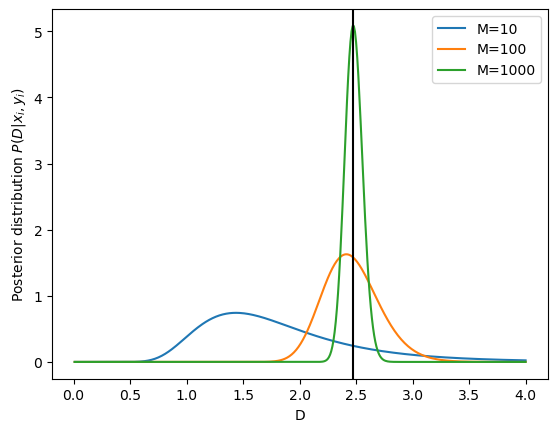

In [7]:
# Plot the Posterior Distribution of the Diffusion coefficient
plt.plot(dist10[:,0],dist10[:,1],label='M=10')
plt.plot(dist100[:,0],dist100[:,1],label='M=100')
plt.plot(dist1000[:,0],dist1000[:,1],label='M=1000')
plt.axvline(x=D1,color='black')
plt.legend()
plt.xlabel('D')
plt.ylabel('Posterior distribution $P(D|{x_i,y_i})$')
plt.show()